Step 2. 
Get the dataGet the data
Convert the data to a format you can easily manipulate (without changing the data itself).

In [29]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import parker
import seaborn as sns
from zlib import crc32
from pandas.plotting import scatter_matrix

In [11]:
# Read the CSV file
dataset = pd.read_csv('Data/50_Startups.csv')

dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
# Check the size and type of data (time series, sample, geographical, etc.).
print('Data set info:')
print(dataset.info())

print('States with count:')
print(dataset["State"].value_counts())

print('Data set type:')
print(type(dataset))

print('Data set description:')
print(dataset.describe())

Data set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
States with count:
New York      17
California    17
Florida       16
Name: State, dtype: int64
Data set type:
<class 'pandas.core.frame.DataFrame'>
Data set description:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   1

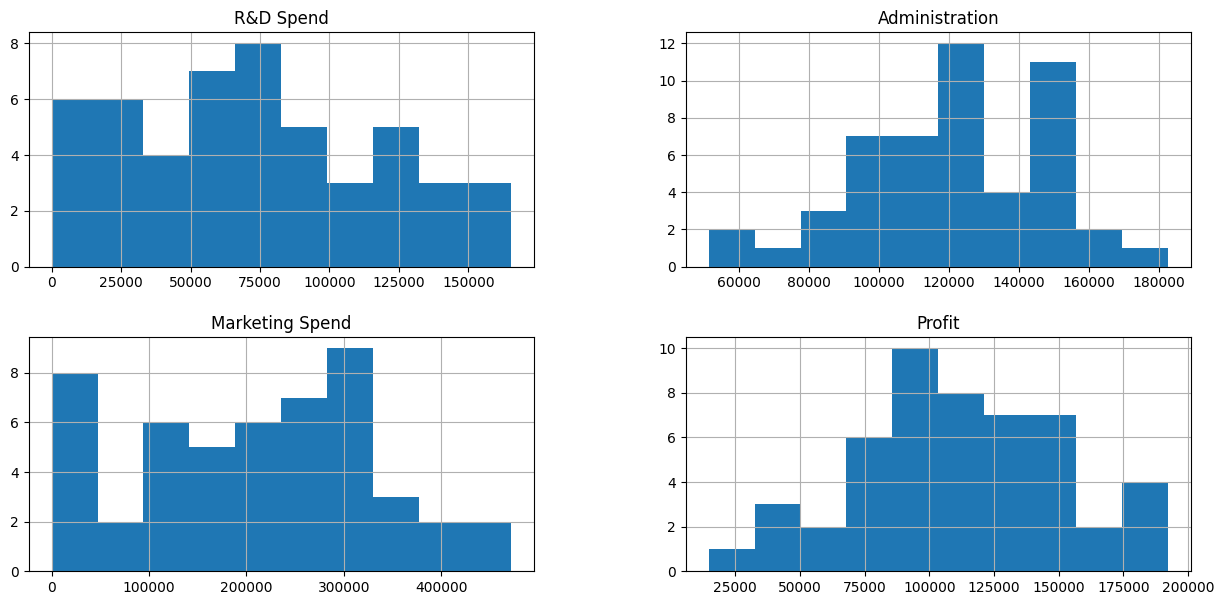

In [13]:
# Visualize the data
dataset.hist(figsize=(15,7))

plt.show()

Create a test set, put it aside, and never look at it (no data snooping!).
A problem here is that the data set is small -> Use stratification.
Action: Make stratified test and learning sets (1 fold).
Code is to be established in your notebook.


In [14]:
startup_with_id = dataset.reset_index() # adds an `index` column

train_set, test_set = parker.split_data_with_id_hash(startup_with_id, 0.2, "index")
print("Stable test set based on rows index, 20% size od training set")
print(test_set)

Stable test set based on rows index, 20% size od training set
    index  R&D Spend  Administration  Marketing Spend       State     Profit
2       2  153441.51       101145.55        407934.54     Florida  191050.39
5       5  131876.90        99814.71        362861.36    New York  156991.12
12     12   93863.75       127320.38        249839.44     Florida  141585.52
16     16   78013.11       121597.55        264346.06  California  126992.93
23     23   67532.53       105751.03        304768.73     Florida  108733.99
25     25   64664.71       139553.16        137962.62  California  107404.34
30     30   61994.48       115641.28         91131.24     Florida   99937.59
35     35   46014.02        85047.44        205517.64    New York   96479.51
36     36   28663.76       127056.21        201126.82     Florida   90708.19
42     42   23640.93        96189.63        148001.11  California   71498.49
45     45    1000.23       124153.04          1903.93    New York   64926.08
49     49     

In [15]:
from sklearn.preprocessing import OneHotEncoder
#define OHT and fit transform
ohe=OneHotEncoder(sparse=False)
transformed=ohe.fit_transform(dataset[['State']])
ohe.categories_

#adding transformed values to df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


[array(['California', 'Florida', 'New York'], dtype=object)]

In [16]:
dataset[ohe.categories_[0]]=transformed
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0


In [17]:
#drop orginal state column and label 
X=dataset.drop(['Profit','State'],axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0.0,0.0,1.0
1,162597.70,151377.59,443898.53,1.0,0.0,0.0
2,153441.51,101145.55,407934.54,0.0,1.0,0.0
3,144372.41,118671.85,383199.62,0.0,0.0,1.0
4,142107.34,91391.77,366168.42,0.0,1.0,0.0


In [18]:
#set Y column
y=dataset['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

print("test set using sklearn instead")

print("X test")
print(X_test)
print("y test")
print(y_test)

(40, 6)
(10, 6)
test set using sklearn instead
X test
    R&D Spend  Administration  Marketing Spend  California  Florida  New York
24   77044.01        99281.34        140574.81         0.0      0.0       1.0
2   153441.51       101145.55        407934.54         0.0      1.0       0.0
26   75328.87       144135.98        134050.07         0.0      1.0       0.0
5   131876.90        99814.71        362861.36         0.0      0.0       1.0
32   63408.86       129219.61         46085.25         1.0      0.0       0.0
12   93863.75       127320.38        249839.44         0.0      1.0       0.0
49       0.00       116983.80         45173.06         1.0      0.0       0.0
0   165349.20       136897.80        471784.10         0.0      0.0       1.0
10  101913.08       110594.11        229160.95         0.0      1.0       0.0
3   144372.41       118671.85        383199.62         0.0      0.0       1.0
y test
24    108552.04
2     191050.39
26    105733.54
5     156991.12
32     97427.84
1

STEP 2.
Explore the Data
Experementing with Attribute Combinations

In [20]:
# Show the unique values
dataset.nunique()


R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
California          2
Florida             2
New York            2
dtype: int64

In [21]:
# Show the dataypes
dataset.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
California         float64
Florida            float64
New York           float64
dtype: object

In [22]:
# Get the correlations of the data
corr = dataset.corr()
print(corr)

                 R&D Spend  Administration  Marketing Spend    Profit  \
R&D Spend         1.000000        0.241955         0.724248  0.972900   
Administration    0.241955        1.000000        -0.032154  0.200717   
Marketing Spend   0.724248       -0.032154         1.000000  0.747766   
Profit            0.972900        0.200717         0.747766  1.000000   
California       -0.143165       -0.015478        -0.168875 -0.145837   
Florida           0.105711        0.010493         0.205685  0.116244   
New York          0.039068        0.005145        -0.033670  0.031368   

                 California   Florida  New York  
R&D Spend         -0.143165  0.105711  0.039068  
Administration    -0.015478  0.010493  0.005145  
Marketing Spend   -0.168875  0.205685 -0.033670  
Profit            -0.145837  0.116244  0.031368  
California         1.000000 -0.492366 -0.515152  
Florida           -0.492366  1.000000 -0.492366  
New York          -0.515152 -0.492366  1.000000  


/var/folders/sr/60t35rxs16b5bhc31mv2ctvr0000gn/T/ipykernel_56405/2896292339.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


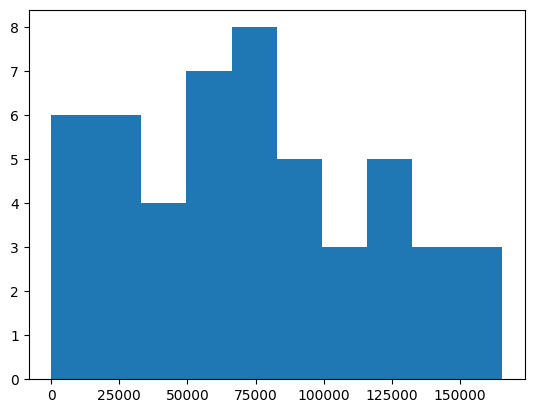

In [23]:
# Histogram of R&D spend
plt.hist(data=dataset,x='R&D Spend')
plt.show()

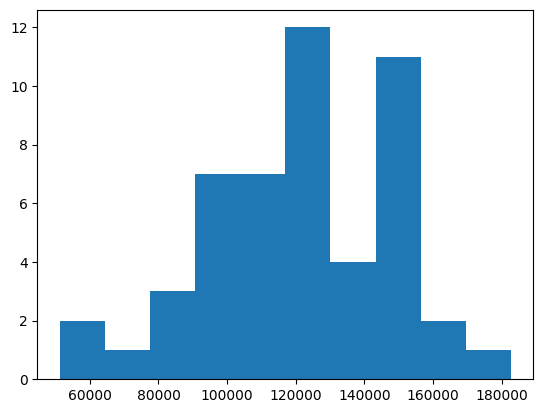

In [24]:
# Histogram of Administrations
plt.hist(data=dataset,x='Administration')
plt.show()

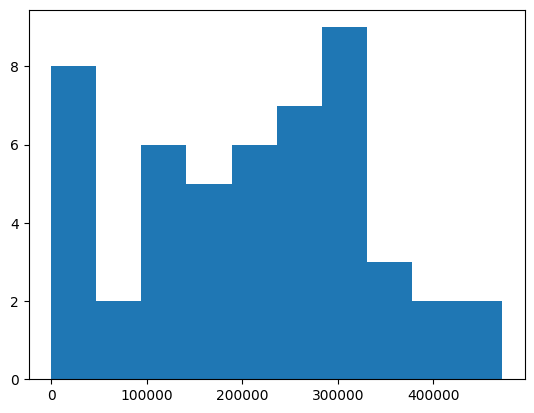

In [25]:
# Histogram of Market Spendings
plt.hist(data=dataset,x='Marketing Spend')
plt.show()

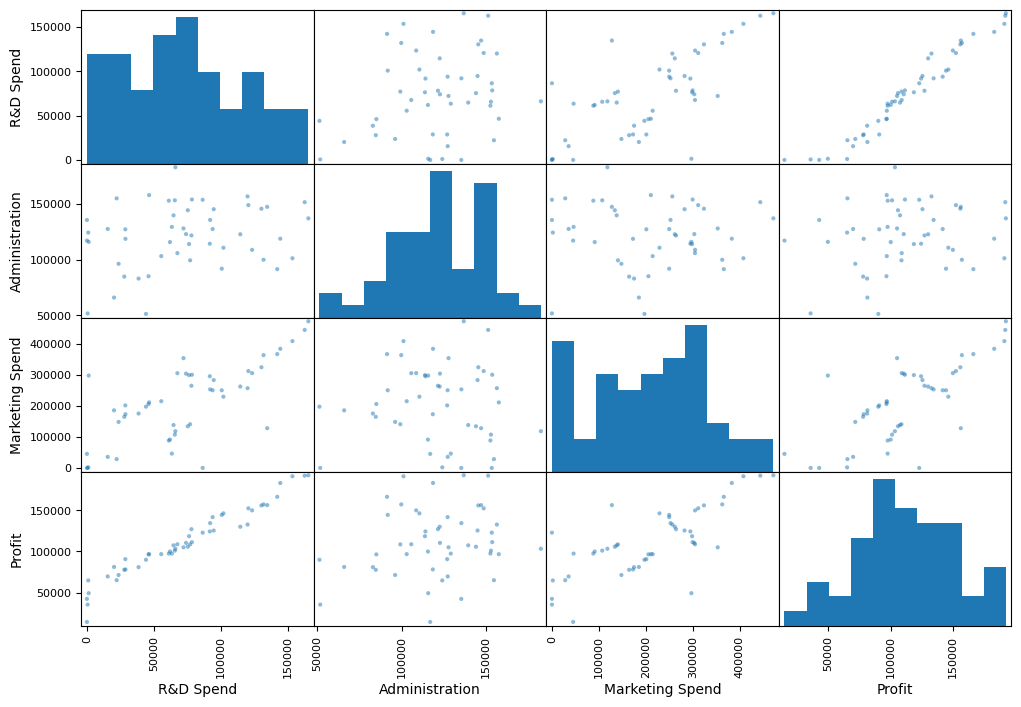

In [28]:
# Make a sactter matrix plot together with the correlation values
attributes = ["R&D Spend", "Administration", "Marketing Spend", "Profit"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
plt.show()


In [30]:
# Experiment with the attributes
dataset['R&D Spend + Administration'] = dataset['R&D Spend'] + dataset['Administration']
dataset['R&D Spend + Marketing Spend'] = dataset['R&D Spend'] + dataset['Marketing Spend']
dataset['Administration + Marketing Spend'] = dataset['Administration'] + dataset['Marketing Spend']
dataset['R&D Spend + Administration + Marketing Spend'] = dataset['R&D Spend'] + dataset['Administration'] + dataset['Marketing Spend']
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York,R&D Spend + Administration,R&D Spend + Marketing Spend,Administration + Marketing Spend,R&D Spend + Administration + Marketing Spend
0,165349.20,136897.80,471784.10,New York,192261.83,0.0,0.0,1.0,302247.00,637133.30,608681.90,774031.10
1,162597.70,151377.59,443898.53,California,191792.06,1.0,0.0,0.0,313975.29,606496.23,595276.12,757873.82
2,153441.51,101145.55,407934.54,Florida,191050.39,0.0,1.0,0.0,254587.06,561376.05,509080.09,662521.60
3,144372.41,118671.85,383199.62,New York,182901.99,0.0,0.0,1.0,263044.26,527572.03,501871.47,646243.88
4,142107.34,91391.77,366168.42,Florida,166187.94,0.0,1.0,0.0,233499.11,508275.76,457560.19,599667.53


List of those with strong correlation:
 R&D Spend
 Marketing Spend

The correlations for profit in R&D Spend: Approx. 0.97
The correlations for profit in Marketing Spend: Approx: 0.75

Indicating a high positive correlation which can be used to predict accurate profit increase in both markets